# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt
import os

# Importing & Analyzing the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\HP\Downloads\Churn.csv')

In [3]:
dataset.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Dropping the 'customerID' column as it does not effect the results 

In [5]:
datset = dataset.drop(['customerID'],axis=1, inplace = True)

In [6]:
dataset.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Checking on Missing Values

In [7]:
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# Converting "TotalCharges" to float type and handling missing values

In [8]:
dataset['TotalCharges'] = dataset['TotalCharges'].astype(float)

In [9]:
dataset=dataset.fillna(dataset.mean())

In [10]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Correlation Matrix

<AxesSubplot:title={'center':'Correlation Matrix'}>

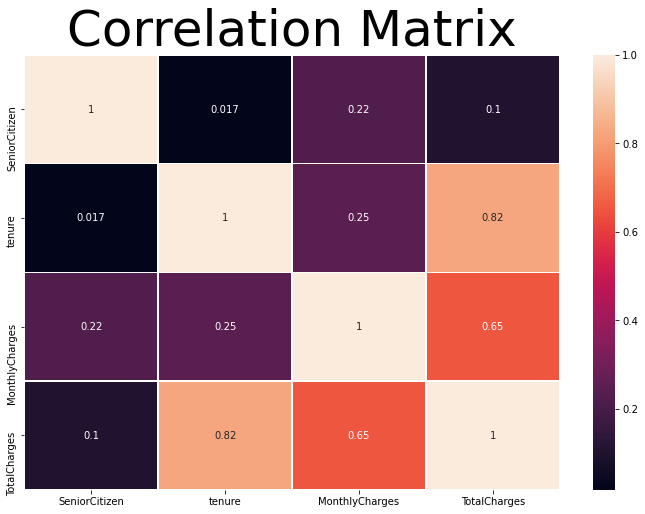

In [11]:
plt.subplots(figsize=(12, 8))
plt.title('Correlation Matrix', size=50)
sns.heatmap(dataset.corr(),annot=True,linewidths=0.5)

# Data Manipulation

Label Encoding

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
cols = dataset.columns
for i in cols:
    dataset[i]=le.fit_transform(dataset[i])

In [13]:
dataset.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2             142            74      0  
1                 0              3             498          3624      0  
2                 1              3             436           536      1  
3                 0              0             266          3570      0  
4                 1              2             729           674      1

In [14]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
features = fit.transform(X)
features

array([[   1,    0,  142,   74],
       [  34,    1,  498, 3624],
       [   2,    0,  436,  536],
       ...,
       [  11,    0,  137, 1265],
       [   4,    0,  795, 1157],
       [  66,    2, 1388, 6151]], dtype=int64)

In [16]:
print(features[0:5,:])

[[   1    0  142   74]
 [  34    1  498 3624]
 [   2    0  436  536]
 [  45    1  266 3570]
 [   2    0  729  674]]


In [17]:
np.set_printoptions(precision=3) 
print(fit.scores_)

[2.587e-01 1.344e+02 8.241e+01 1.330e+02 1.628e+04 9.726e-02 9.747e+00
 9.821e+00 5.516e+02 2.301e+02 1.913e+02 5.233e+02 7.490e+00 8.235e+00
 1.116e+03 1.057e+02 5.849e+01 7.945e+04 4.572e+05]


In [18]:
c=['Partner','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup','TechSupport', 'StreamingTV',
       'StreamingMovies','PaymentMethod',
       'MonthlyCharges', 'TotalCharges']

In [19]:
from sklearn.preprocessing import StandardScaler
x=dataset.loc[:,c]
scaler = StandardScaler()
X=scaler.fit_transform(X)
x=scaler.fit_transform(x)

In [20]:
X

array([[-1.01 , -0.44 ,  1.035, ...,  0.399, -1.132, -1.56 ],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.388,  0.269],
       [ 0.991, -0.44 , -0.967, ...,  1.335, -0.517, -1.322],
       ...,
       [-1.01 , -0.44 ,  1.035, ...,  0.399, -1.142, -0.946],
       [ 0.991,  2.273,  1.035, ...,  1.335,  0.233, -1.002],
       [ 0.991, -0.44 , -0.967, ..., -1.474,  1.472,  1.57 ]])

# Data Visualization

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


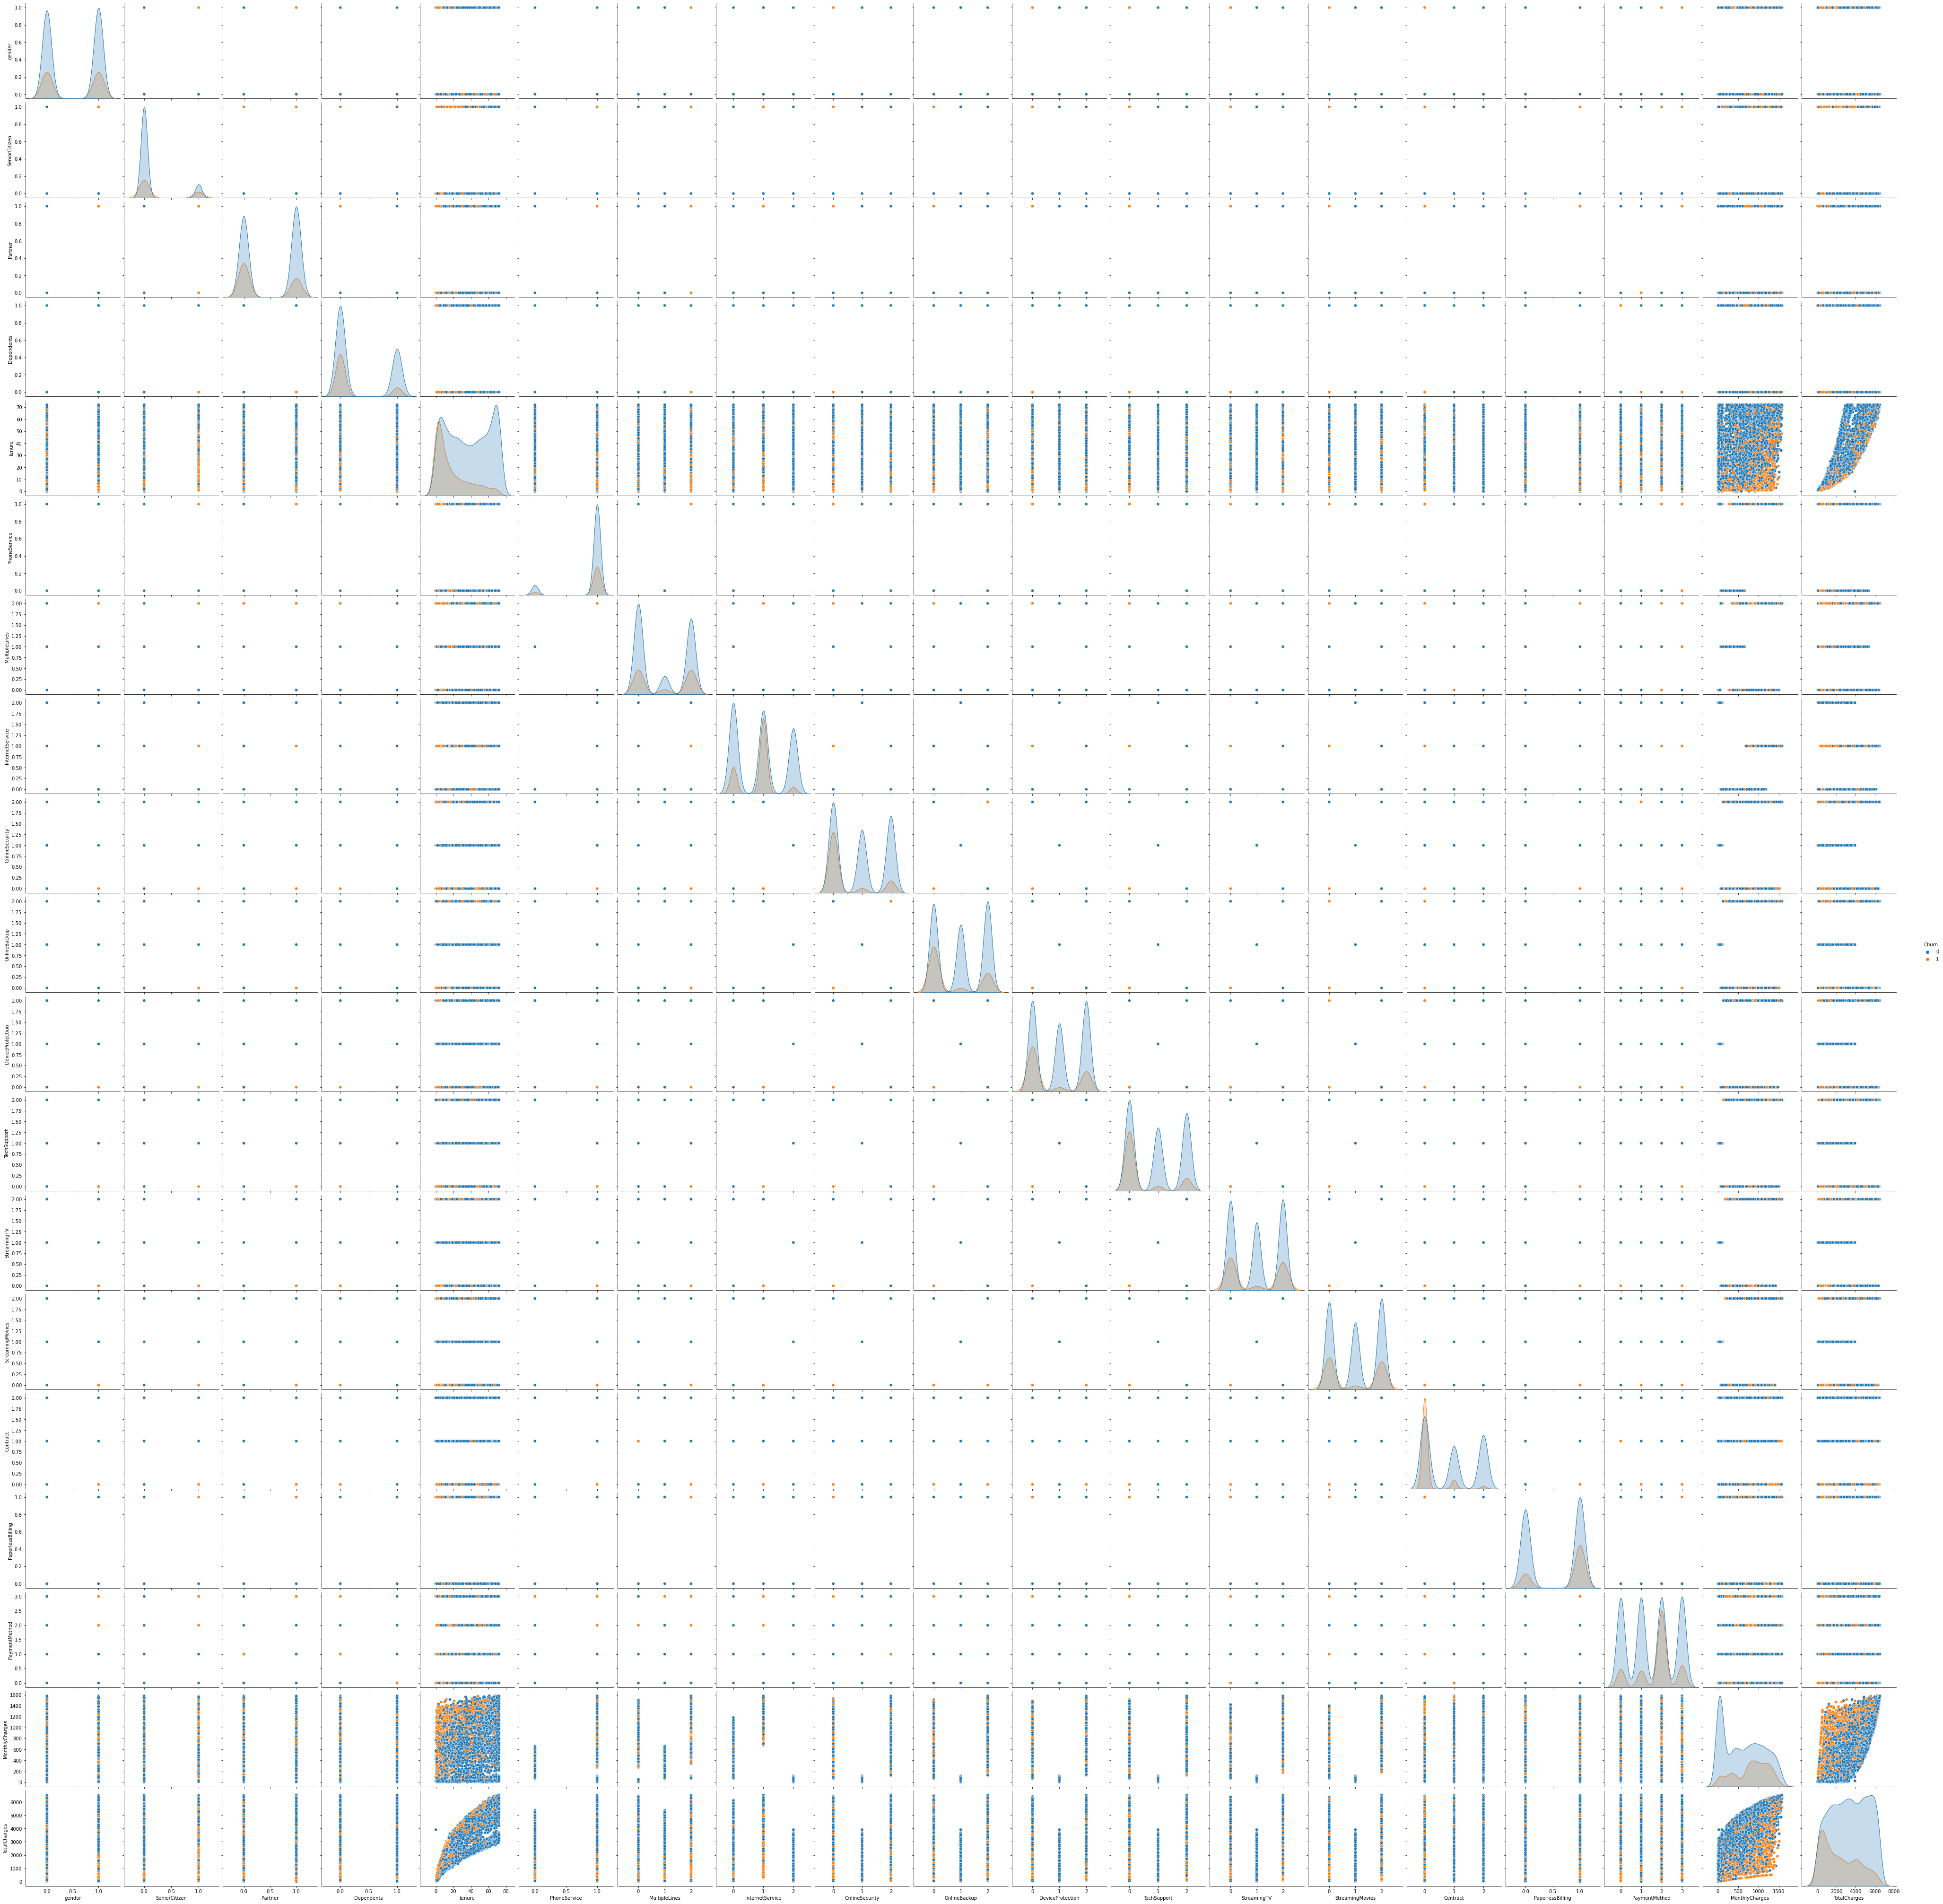

In [21]:
sns.pairplot(dataset, hue="Churn", size=3)

# Implementing Machine Learning Models

In [22]:
#APPLYING MODELS ON UNBALENCED CLASS DATA
#SUPPORT VECTOR MACHINE
f1 = []
acc = []
n = 50
print("SVM:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train) 
    ypred = svm.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

SVM:
Avg F1-Score 0.7810946705577535
Max F1-Score 0.8109205253854874
Min F1-Score 0.7569401104442779
Avg Accuracy 0.7984953867991483
Max Accuracy 0.8211497515968772
Min Accuracy 0.7792760823278921


In [23]:
#LOGISTIC
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    ypred=lr.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7924230192244718
Max F1-Score 0.82100197898197
Min F1-Score 0.7569401104442779
Avg Accuracy 0.8032324600457408
Max Accuracy 0.8248935163274964
Min Accuracy 0.7792760823278921


In [24]:
#RANDOM FOREST
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.790399206483099
Max F1-Score 0.82100197898197
Min F1-Score 0.7569401104442779
Avg Accuracy 0.8009564435511419
Max Accuracy 0.8248935163274964
Min Accuracy 0.7721788502484032


In [25]:
#  OUR DATA IS UNBALENCE HENCE BALENCING THE DATA USING SMOTE

a = np.array(dataset.iloc[:, dataset.columns != 'Churn'])
b = np.array(dataset.iloc[:, dataset.columns == 'Churn'])
print('Shape of X: {}'.format(a.shape))
print('Shape of y: {}'.format(b.shape))

Shape of X: (7043, 19)
Shape of y: (7043, 1)


In [26]:
#NAIVE BAYES
n = 50
print("Naive Bayes:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y2pred = nb.predict(X_test)
    f1.append(f1_score(y_test, y2pred, average='weighted'))
    acc.append(accuracy_score(y_test, y2pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Naive Bayes:
Avg F1-Score 0.7865741647759215
Max F1-Score 0.82100197898197
Min F1-Score 0.7473030548784275
Avg Accuracy 0.7936146374281754
Max Accuracy 0.8248935163274964
Min Accuracy 0.7359829666430092


In [27]:
#SUPPORT VECTOR MACHINE
n = 50
print("SVM:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    svm = SVC(kernel='linear') 
    svm.fit(X_train, y_train) 
    y4pred = svm.predict(X_test)
    f1.append(f1_score(y_test, y4pred, average='weighted'))
    acc.append(accuracy_score(y_test, y4pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

SVM:
Avg F1-Score 0.7855556109659546
Max F1-Score 0.82100197898197
Min F1-Score 0.7473030548784275
Avg Accuracy 0.7941374982072184
Max Accuracy 0.8248935163274964
Min Accuracy 0.7359829666430092


In [29]:
#LOGISTIC
n = 150
print("Logistic:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    lr = LogisticRegression(random_state=0, solver='liblinear')
    lr.fit(X_train, y_train)
    y5pred=lr.predict(X_test)
    f1.append(f1_score(y_test, y5pred, average='weighted'))
    acc.append(accuracy_score(y_test, y5pred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Logistic:
Avg F1-Score 0.7888889706287538
Max F1-Score 0.82100197898197
Min F1-Score 0.7473030548784275
Avg Accuracy 0.797460848839705
Max Accuracy 0.8248935163274964
Min Accuracy 0.7359829666430092


In [30]:
# NOW APPLYING MODEL TO BALENCED CLASS DATA.
f1 = []
acc = []
n = 50
print("Random Forest:")
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    rf = RandomForestClassifier(n_estimators = 100, random_state = 0) 
    rf.fit(X_train, y_train)
    ypred=rf.predict(X_test)
    f1.append(f1_score(y_test, ypred, average='weighted'))
    acc.append(accuracy_score(y_test, ypred))
print("Avg F1-Score",np.mean(f1))
print("Max F1-Score",np.max(f1))
print("Min F1-Score",np.min(f1))
print("Avg Accuracy",np.mean(acc))
print("Max Accuracy",np.max(acc))
print("Min Accuracy",np.min(acc))

Random Forest:
Avg F1-Score 0.7807874002606039
Max F1-Score 0.8031700448392032
Min F1-Score 0.7492949495868327
Avg Accuracy 0.7905039034776438
Max Accuracy 0.8105039034776437
Min Accuracy 0.7629524485450674


# Model evaluation

accuracy:   78.495
[[918 110]
 [193 188]]


Text(26.5, 0.5, 'true values')

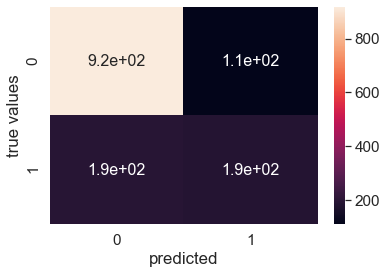

In [31]:
#RANDOM FOREST
score = metrics.accuracy_score(y_test, ypred)
print("accuracy:   %0.3f" % (score*100))
cm = metrics.confusion_matrix(y_test, ypred, labels=[0,1])
print(cm)
sns.set(font_scale=1.4)
sns.heatmap(cm,annot=True,annot_kws={'size':16})
#sns.set_axis_labels('true values','predicted')
plt.xlabel("predicted")
plt.ylabel("true values")

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,ypred)
print('AUC: %.3f' % auc)

AUC: 0.693


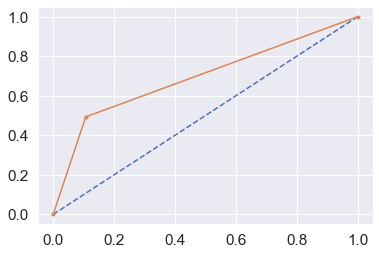

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, ypred)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()


# Data Exploration

In [38]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\HP\anaconda3\python.exe -m pip install --upgrade pip' command.


In [40]:
def customercountplot(x):
    z = "Customer Count wrt "+ x
    plt.title(z,size=20)
    sns.countplot(dataset[x])

In [41]:
def churnratio():
    import plotly.offline as py
    import plotly.graph_objs as go
    val = dataset["Churn"].value_counts().values.tolist()

    trace = go.Pie(labels = ["Not Churned","Churned"] ,
                   values = val ,
                   marker = dict(colors =  [ 'royalblue' ,'lime']), hole = .5)
    layout = go.Layout(dict(title = "Train Dataset Customers"))
    data = [trace]
    fig = go.Figure(data = data,layout = layout)
    py.iplot(fig)

In [59]:
def churnrate():
    features = ['PhoneService','MultipleLines','InternetService',
                'TechSupport','StreamingTV','StreamingMovies','Contract']
    for i, item in enumerate(features):
        if i < 3:
            fig1 = pd.crosstab(dataset[item],dataset.Churn,margins=True)
            fig1.drop('All',inplace=True)
            fig1.drop('All',axis=1, inplace=True)
            fig1.plot.bar()
            z= 'Customer Churned wrt ' + item
            plt.title(z,size=20)
        elif i >=3 and i < 6:
            fig1 = pd.crosstab(dataset[item],dataset.Churn,margins=True)
            fig1.drop('All',inplace=True)
            fig1.drop('All',axis=1, inplace=True)
            fig1.plot.bar()
            z= 'Customer Churned wrt ' + item
            plt.title(z,size=20)
        elif i < 9:
            fig1 = pd.crosstab(dataset[item],dataset.Churn,margins=True)
            fig1.drop('All',inplace=True)
            fig1.drop('All',axis=1, inplace=True)
            fig1.plot.bar()
            z= 'Customer Churned wrt ' + item
            plt.title(z,size=20)

In [43]:
churnratio()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



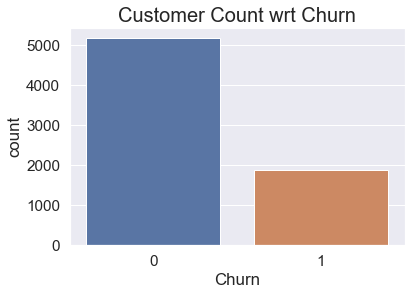

In [44]:
customercountplot('Churn')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



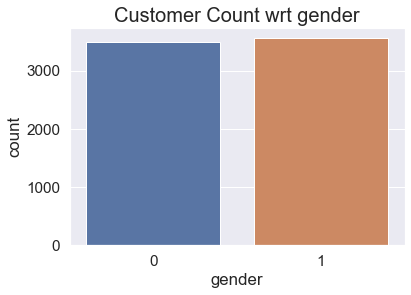

In [45]:
customercountplot('gender')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



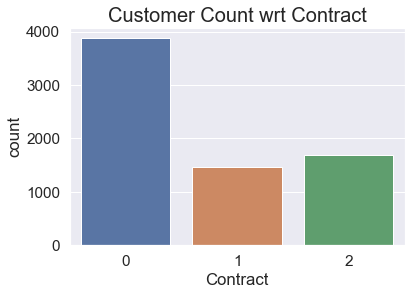

In [46]:
customercountplot('Contract')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



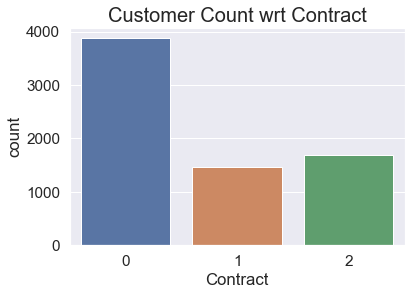

In [47]:
customercountplot('Contract')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



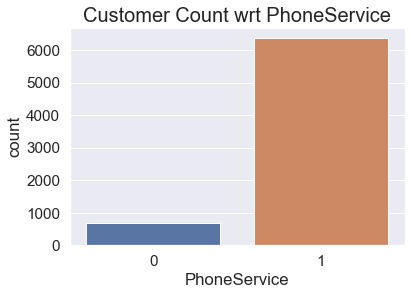

In [48]:
customercountplot('PhoneService')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



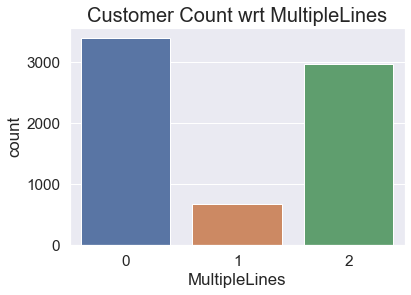

In [49]:
customercountplot('MultipleLines')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



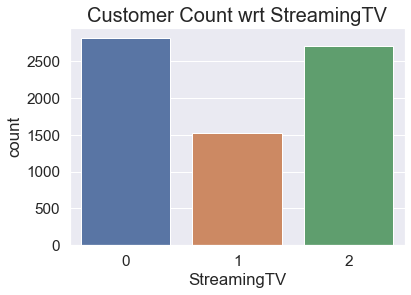

In [50]:
customercountplot('StreamingTV')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Customer Count wrt to tenure'}, xlabel='tenure_group', ylabel='count'>

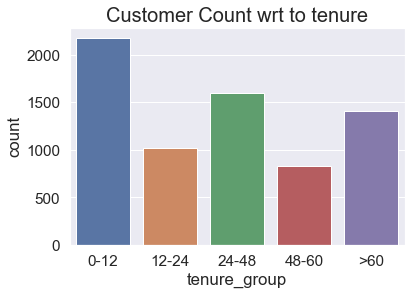

In [52]:
tempdf = dataset.copy()
bins=[0,12,24,48,60,100]
tempdf['tenure_group']=pd.cut(tempdf['tenure'],bins,labels=['0-12','12-24','24-48','48-60','>60'])
plt.title('Customer Count wrt to tenure',size=20)
sns.countplot(tempdf['tenure_group'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Distribution Plot For Montly Charges'}, xlabel='MonthlyCharges', ylabel='Density'>

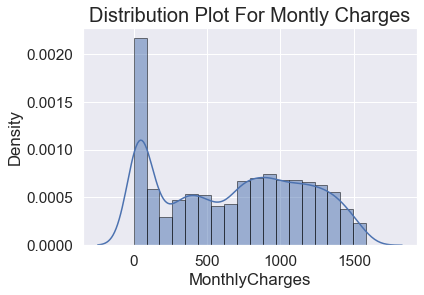

In [54]:
plt.title("Distribution Plot For Montly Charges",size=20)
sns.distplot(dataset['MonthlyCharges'],hist_kws={'edgecolor':'black','alpha':.5})

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:title={'center':'Distribution Plot For TotalCharges'}, xlabel='TotalCharges', ylabel='Density'>

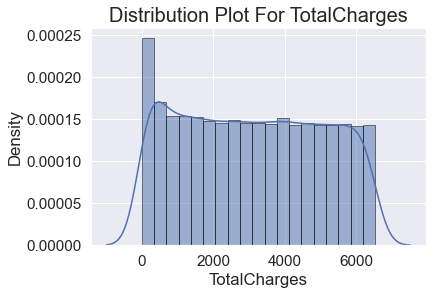

In [55]:
plt.title("Distribution Plot For TotalCharges",size=20)
sns.distplot(dataset['TotalCharges'],hist_kws={'edgecolor':'black','alpha':.5})

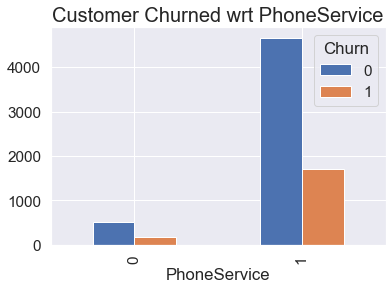

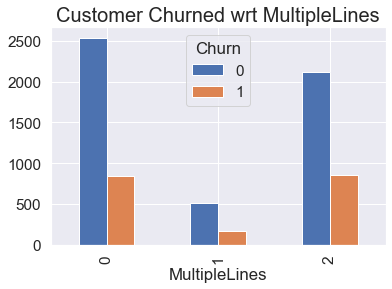

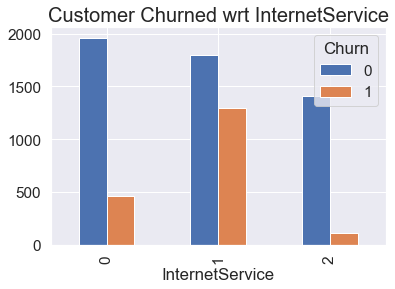

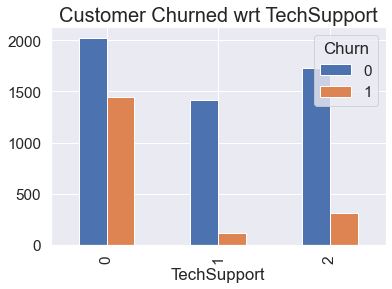

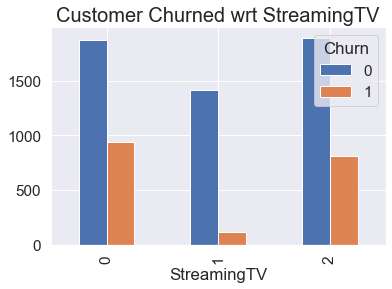

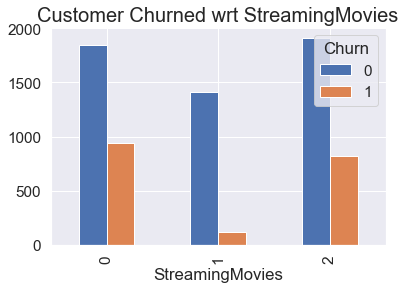

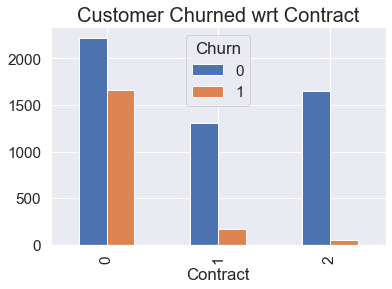

In [60]:
churnrate()